# Rossmann Sales Forecasting Analysis

This notebook will guide you through the process of reading the project information, importing required libraries, and performing an initial analysis of the Rossmann sales dataset.

## Import Required Libraries
We will import pandas, numpy, matplotlib, and seaborn for data analysis and visualization.

In [1]:
# Import all required libraries for data analysis and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import scipy
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Add StandardScaler and LabelEncoder for feature scaling and encoding
from sklearn.preprocessing import StandardScaler, LabelEncoder
# If you need more libraries, add them below
from xgboost import XGBRegressor

## Dataset Analysis
Let's load the training and store datasets and perform basic exploratory data analysis.

In [3]:
# Load datasets
train_df = pd.read_csv('train.csv')
store_df = pd.read_csv('store.csv')

# Display the first few rows of each dataset
print('Train Data:')
display(train_df.head())
print('\nStore Data:')
display(store_df.head())

Train Data:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id
0,1,5,2015-07-17,4852,519,1,1,0,0,303445
1,2,5,2015-07-17,4518,495,1,1,0,1,959585
2,3,5,2015-07-17,6679,673,1,1,0,1,739744
3,4,5,2015-07-17,10514,1343,1,1,0,1,864001
4,5,5,2015-07-17,4355,513,1,1,0,1,981931



Store Data:


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
# Check for missing values and data types
print('Train Data Info:')
train_df.info()
print('\nMissing values in Train Data:')
print(train_df.isnull().sum())

print('\nStore Data Info:')
store_df.info()
print('\nMissing values in Store Data:')
print(store_df.isnull().sum())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001599 entries, 0 to 1001598
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1001599 non-null  int64 
 1   DayOfWeek      1001599 non-null  int64 
 2   Date           1001599 non-null  object
 3   Sales          1001599 non-null  int64 
 4   Customers      1001599 non-null  int64 
 5   Open           1001599 non-null  int64 
 6   Promo          1001599 non-null  int64 
 7   StateHoliday   1001599 non-null  object
 8   SchoolHoliday  1001599 non-null  int64 
 9   Id             1001599 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 76.4+ MB

Missing values in Train Data:
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Id               0
dtype: int64

Store Data Info:
<class 'pandas.core.frame.D

In [5]:
# Summary statistics for training data
train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Id
count,1.001599e+06,1.001599e+06,1.001599e+06,1.001599e+06,1.001599e+06,1.001599e+06,1.001599e+06,1.001599e+06
mean,5.584364e+02,3.998315e+00,5.770573e+03,6.333030e+02,8.296454e-01,3.818944e-01,1.734596e-01,5.085189e+05
std,3.219092e+02,1.997350e+00,3.852568e+03,4.649430e+02,3.759442e-01,4.858511e-01,3.786443e-01,2.934647e+05
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.722000e+03,4.040000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.544410e+05
50%,5.580000e+02,4.000000e+00,5.741000e+03,6.100000e+02,1.000000e+00,0.000000e+00,0.000000e+00,5.088100e+05
75%,8.380000e+02,6.000000e+00,7.854000e+03,8.380000e+02,1.000000e+00,1.000000e+00,0.000000e+00,7.626425e+05
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.017207e+06


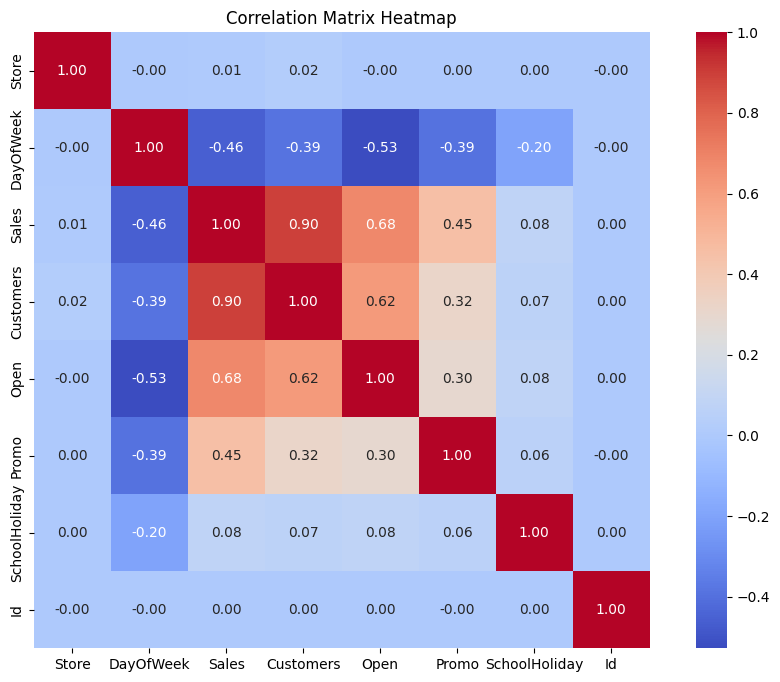

In [6]:
# Correlation matrix heatmap using seaborn
corr_matrix = train_df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

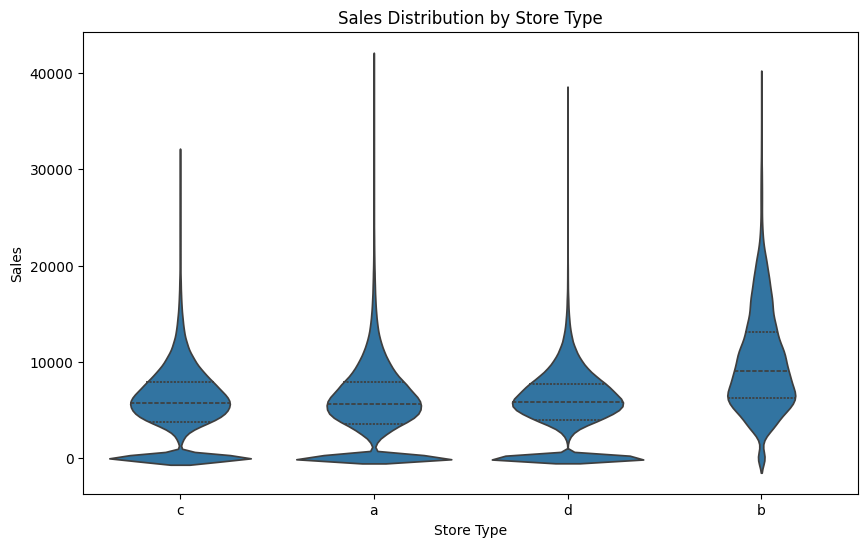

In [7]:
# Violin plot: Sales distribution by StoreType
# Merge train and store data to get StoreType in the training set
train_merged = pd.merge(train_df, store_df[['Store','StoreType']], on='Store', how='left')
plt.figure(figsize=(10,6))
sns.violinplot(x='StoreType', y='Sales', data=train_merged, inner='quartile')
plt.title('Sales Distribution by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.show()

  CompetitionDistanceBin        Sales
0                  <500m  6307.178835
1                 500-1k  5563.045714
2                  1k-2k  5895.644444
3                  2k-4k  5398.598480
4                  4k-8k  5663.172615
5                 8k-20k  5603.012776
6                   20k+  5929.983242


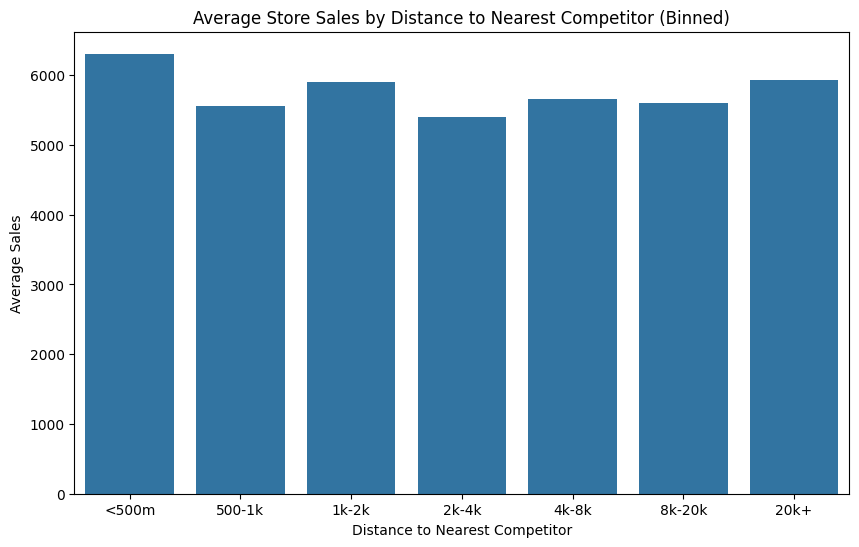

In [9]:
# Check if 'CompetitionDistance' exists, if not, merge it from store_df
if 'CompetitionDistance' not in train_merged.columns:
    train_merged = pd.merge(train_merged, store_df[['Store', 'CompetitionDistance']], on='Store', how='left')

# Bin CompetitionDistance to avoid overfitting and analyze sales per bin
distance_bins = [0, 500, 1000, 2000, 4000, 8000, 20000, float('inf')]
distance_labels = ['<500m', '500-1k', '1k-2k', '2k-4k', '4k-8k', '8k-20k', '20k+']
train_merged['CompetitionDistanceBin'] = pd.cut(train_merged['CompetitionDistance'], bins=distance_bins, labels=distance_labels)

# Show average sales per bin
bin_sales = train_merged.groupby('CompetitionDistanceBin')['Sales'].mean().reset_index()
print(bin_sales)

plt.figure(figsize=(10,6))
sns.barplot(x='CompetitionDistanceBin', y='Sales', data=bin_sales)
plt.title('Average Store Sales by Distance to Nearest Competitor (Binned)')
plt.xlabel('Distance to Nearest Competitor')
plt.ylabel('Average Sales')
plt.show()

We can observe from this particular plot that Distance to the nearest competitor is not as important a feature as it could've been

In [10]:
# Check for missing values in the merged dataset
missing_summary = train_merged.isnull().sum()
print('Missing values in merged dataset:')
print(missing_summary[missing_summary > 0])

# Only drop rows for columns that actually exist in the DataFrame
cols_to_drop = [col for col in ['CompetitionDistance', 'StoreType'] if col in train_merged.columns]
if cols_to_drop:
    train_merged_clean = train_merged.dropna(subset=cols_to_drop)
    print(f"Rows before drop: {len(train_merged)}, Rows after drop: {len(train_merged_clean)}")
    train_merged = train_merged_clean
else:
    print(f"Columns {['CompetitionDistance', 'StoreType']} not found in merged data. No rows dropped.")

Missing values in merged dataset:
CompetitionDistance       2600
CompetitionDistanceBin    2600
dtype: int64
Rows before drop: 1001599, Rows after drop: 998999


# Feature Engineering
In this section, we will map the most important features, use GridSearchCV for model selection, and visualize feature importances before and after normalization.

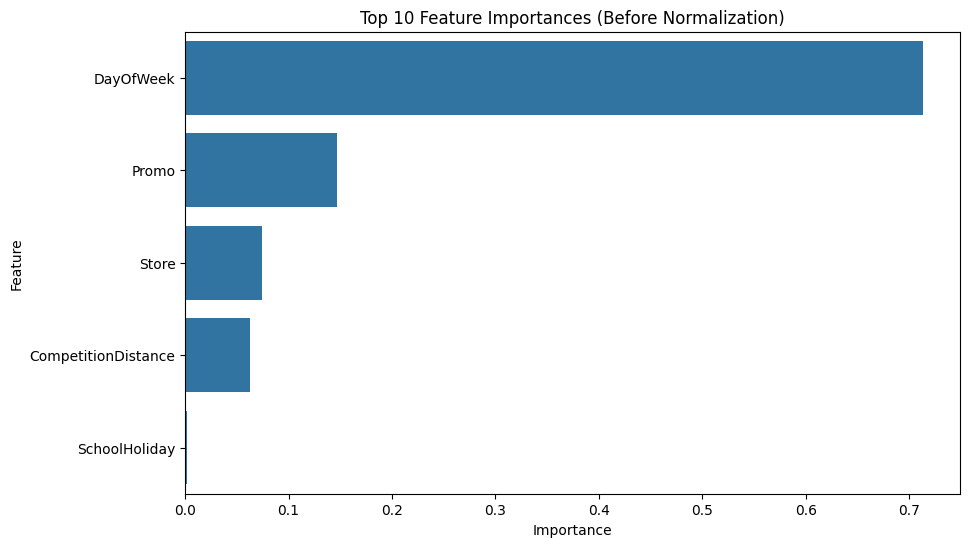

In [17]:
# Prepare data for feature importance analysis
# Select relevant features (excluding target and IDs)
features = ['Store', 'DayOfWeek', 'Promo', 'SchoolHoliday', 'CompetitionDistance']
# Encode categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
if 'StoreType' in train_merged.columns:
    train_merged['StoreType_enc'] = le.fit_transform(train_merged['StoreType'])
    features.append('StoreType_enc')
    # Also keep the original StoreType as a feature for analysis
    features.append('StoreType')

X = train_merged[features].fillna(0)
y = train_merged['Sales']

# Use RandomForestRegressor with GridSearchCV to find best parameters
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [50], 'max_depth': [5, 10]}
gs = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1)
gs.fit(X, y)

# Get feature importances
importances = gs.best_estimator_.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize top 10 features
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances (Before Normalization)')
plt.show()

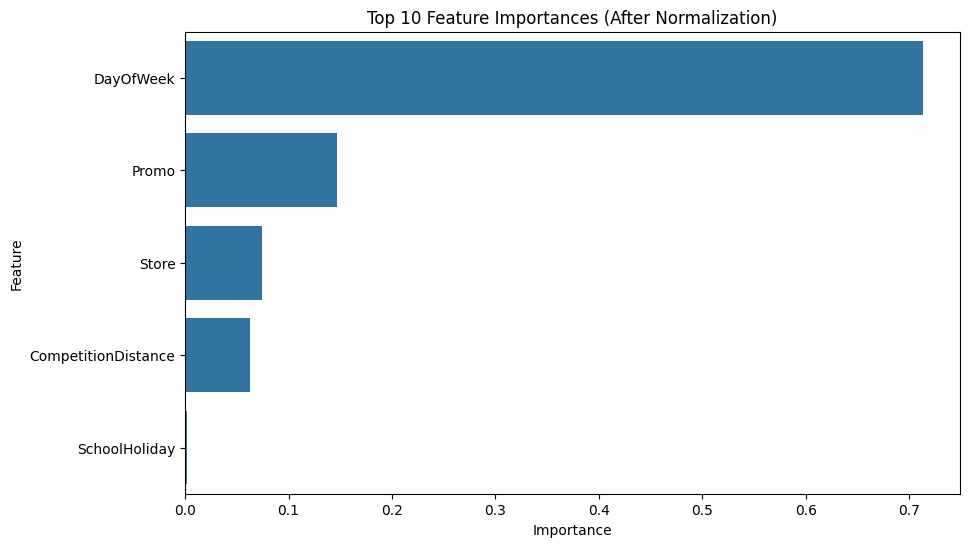

In [18]:
# Normalize features and repeat feature importance analysis
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit RandomForestRegressor again on normalized data
gs_scaled = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1)
gs_scaled.fit(X_scaled, y)

importances_scaled = gs_scaled.best_estimator_.feature_importances_
feature_importance_scaled_df = pd.DataFrame({'Feature': features, 'Importance': importances_scaled})
feature_importance_scaled_df = feature_importance_scaled_df.sort_values(by='Importance', ascending=False)

# Visualize top 10 features after normalization
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_scaled_df.head(10))
plt.title('Top 10 Feature Importances (After Normalization)')
plt.show()

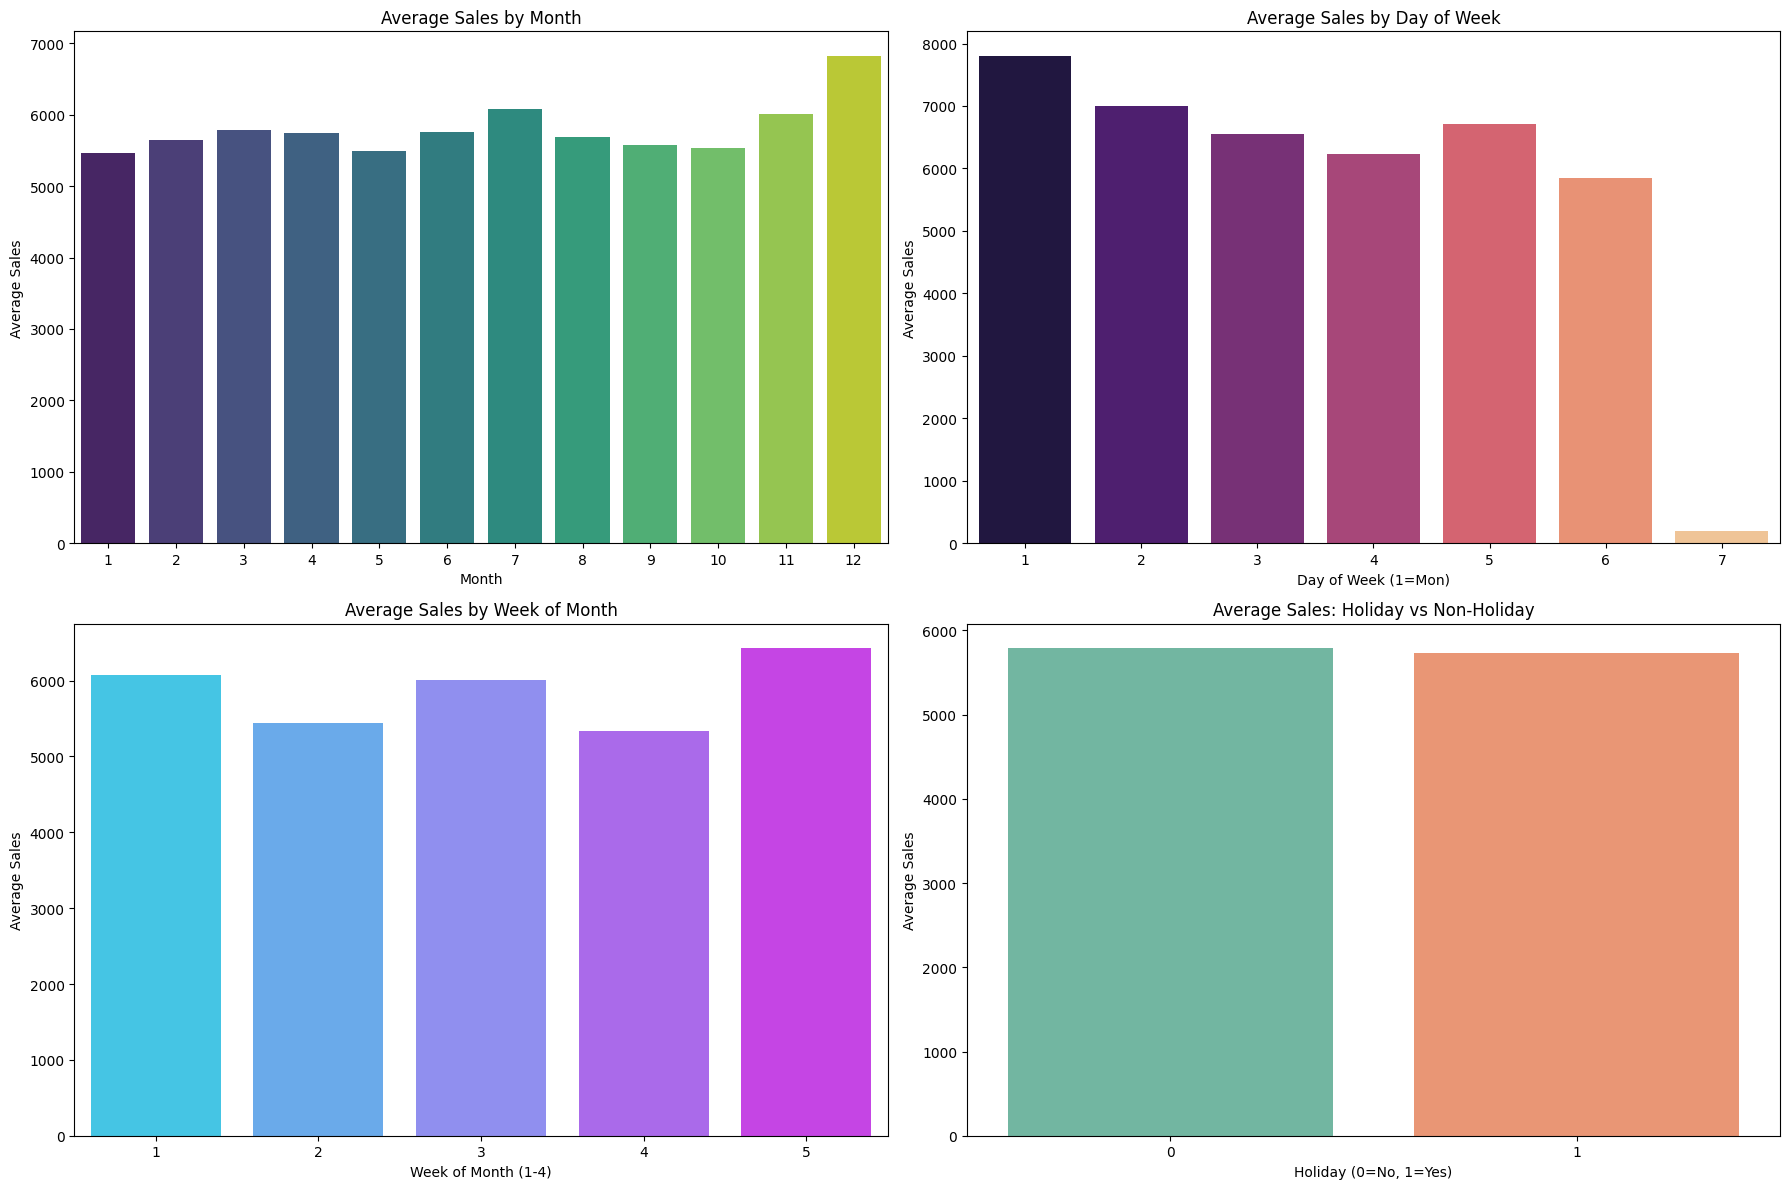

In [20]:
# Plot 4 subplots: average sales by month, by day of week, by week of month, and sales vs holidays
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Ensure 'Date' is parsed as datetime
if 'Date' not in train_df.columns:
    train_df = pd.read_csv('train.csv', parse_dates=['Date'])
else:
    train_df['Date'] = pd.to_datetime(train_df['Date'])

# 1. Average sales by month
train_df['Month'] = train_df['Date'].dt.month
monthly_sales = train_df.groupby('Month')['Sales'].mean().reset_index()
sns.barplot(x='Month', y='Sales', data=monthly_sales, ax=axs[0,0], palette='viridis')
axs[0,0].set_title('Average Sales by Month')
axs[0,0].set_xlabel('Month')
axs[0,0].set_ylabel('Average Sales')

# 2. Average sales by day of week
train_df['DayOfWeek'] = train_df['Date'].dt.dayofweek + 1  # 1=Monday, 7=Sunday
dayofweek_sales = train_df.groupby('DayOfWeek')['Sales'].mean().reset_index()
sns.barplot(x='DayOfWeek', y='Sales', data=dayofweek_sales, ax=axs[0,1], palette='magma')
axs[0,1].set_title('Average Sales by Day of Week')
axs[0,1].set_xlabel('Day of Week (1=Mon)')
axs[0,1].set_ylabel('Average Sales')

# 3. Average sales by week of month (bin days into weeks 1-4)
train_df['WeekOfMonth'] = train_df['Date'].apply(lambda d: (d.day-1)//7 + 1)
weekofmonth_sales = train_df.groupby('WeekOfMonth')['Sales'].mean().reset_index()
sns.barplot(x='WeekOfMonth', y='Sales', data=weekofmonth_sales, ax=axs[1,0], palette='cool')
axs[1,0].set_title('Average Sales by Week of Month')
axs[1,0].set_xlabel('Week of Month (1-4)')
axs[1,0].set_ylabel('Average Sales')

# 4. Sales vs holidays (StateHoliday and SchoolHoliday)
# Combine both holiday columns for a simple plot
train_df['AnyHoliday'] = ((train_df['StateHoliday'] != '0') | (train_df['SchoolHoliday'] == 1)).astype(int)
holiday_sales = train_df.groupby('AnyHoliday')['Sales'].mean().reset_index()
sns.barplot(x='AnyHoliday', y='Sales', data=holiday_sales, ax=axs[1,1], palette='Set2')
axs[1,1].set_title('Average Sales: Holiday vs Non-Holiday')
axs[1,1].set_xlabel('Holiday (0=No, 1=Yes)')
axs[1,1].set_ylabel('Average Sales')

plt.tight_layout()
plt.show()

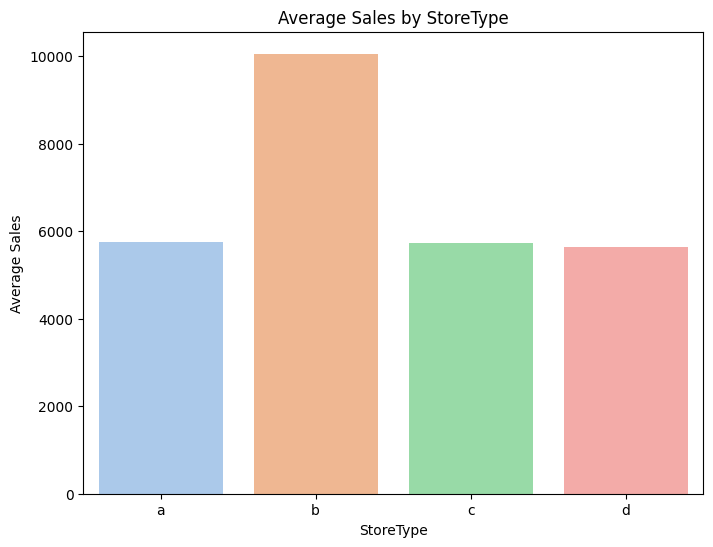

In [11]:
# Plot average sales by StoreType (before engineering Size)
if 'StoreType' not in train_merged.columns:
    # Merge StoreType if missing
    train_merged = pd.merge(train_merged, store_df[['Store','StoreType']], on='Store', how='left')

avg_sales_by_storetype = train_merged.groupby('StoreType')['Sales'].mean().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='StoreType', y='Sales', data=avg_sales_by_storetype, order=sorted(train_merged['StoreType'].dropna().unique()), palette='pastel')
plt.title('Average Sales by StoreType')
plt.xlabel('StoreType')
plt.ylabel('Average Sales')
plt.show()

# Engineer 'Size' feature using StoreType
size_map = {'a': 'Large', 'b': 'Medium', 'c': 'Small', 'd': 'ExtraSmall'}
train_merged['Size'] = train_merged['StoreType'].map(size_map)

Feature Engineering: Store Size

 We will now engineer a new feature called 'Size' based on StoreType. This feature will categorize stores into size groups (e.g., Large, Medium, Small, ExtraSmall) using the StoreType as a proxy for store size. This can help capture the effect of store scale on sales performance.

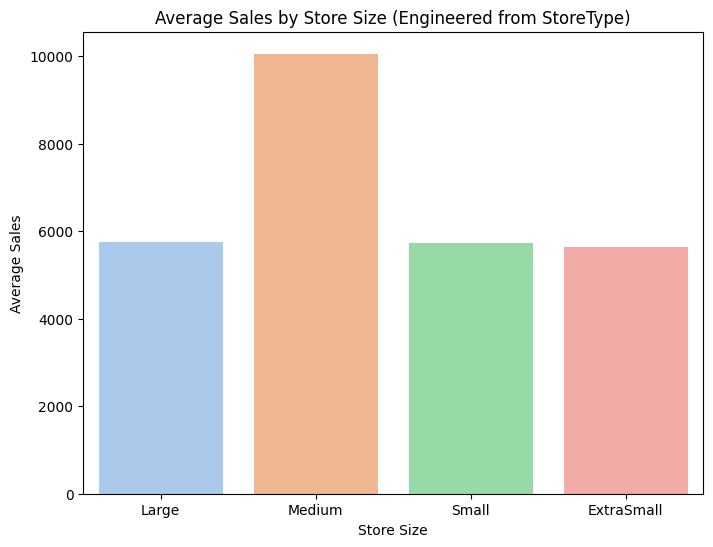

In [26]:
# Plot average sales by Size (engineered from StoreType)
avg_sales_by_size = train_merged.groupby('Size')['Sales'].mean().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='Size', y='Sales', data=avg_sales_by_size, order=['Large', 'Medium', 'Small', 'ExtraSmall'], palette='pastel')
plt.title('Average Sales by Store Size (Engineered from StoreType)')
plt.xlabel('Store Size')
plt.ylabel('Average Sales')
plt.show()

# Model Training and Evaluation
In this section, we will train and evaluate machine learning models to predict Rossmann sales. We will use XGBoost Regressor for its superior performance in regression tasks.

In [12]:
# Prepare features and target
target = 'Sales'
feature_cols = [col for col in train_merged.columns if col not in ['Sales', 'Date']]
X = train_merged[feature_cols].select_dtypes(include=[np.number]).fillna(0)
y = train_merged[target]

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBRegressor
xgb_model = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(f"Validation MSE: {mse:.2f}")
print(f"Validation R2: {r2:.2f}")

Validation MSE: 848136.75
Validation R2: 0.94


In [13]:
# Cross-validation for XGBRegressor
cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = (-cv_scores) ** 0.5
print(f'Cross-validated RMSE scores: {cv_rmse}')
print(f'Mean CV RMSE: {cv_rmse.mean():.2f}')

Cross-validated RMSE scores: [ 980.31073712  969.37129746  864.52405385 1001.22864223  892.07783723]
Mean CV RMSE: 941.50


In [15]:
# Prepare test data and create a submission file
# Load test data
submission_test = pd.read_csv('test.csv')

# Merge with store data to get all features
submission_test_merged = pd.merge(submission_test, store_df, on='Store', how='left')

# Recreate LabelEncoder and size_map as in training
from sklearn.preprocessing import LabelEncoder
le_submission = LabelEncoder()
le_submission.fit(train_merged['StoreType'].astype(str))
size_map = {'a': 'Large', 'b': 'Medium', 'c': 'Small', 'd': 'ExtraSmall'}

# Engineer features as in training
if 'StoreType' in submission_test_merged.columns:
    submission_test_merged['StoreType_enc'] = le_submission.transform(submission_test_merged['StoreType'].astype(str))
    submission_test_merged['Size'] = submission_test_merged['StoreType'].map(size_map)

# Select the same features as used for training
submission_features = [col for col in X.columns if col in submission_test_merged.columns]
X_submission = submission_test_merged[submission_features].select_dtypes(include=[np.number]).fillna(0)

# Predict sales
submission_test_merged['Sales'] = xgb_model.predict(X_submission)

# Prepare submission file
submission = submission_test_merged[['Id', 'Sales']]
submission.to_csv('rossmansub.csv', index=False)
print('Submission file rossmansub.csv created.')

Submission file rossmansub.csv created.


In [16]:
# Export the trained XGBRegressor model to a file for future use
import joblib
joblib.dump(xgb_model, 'xgb_model.joblib')
print('Trained XGBRegressor model exported to xgb_model.joblib')

Trained XGBRegressor model exported to xgb_model.joblib
